In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Datasets/creditcard.csv')
df=df.drop(columns=['Time','Amount'])
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


## Applying StratifiedKFold cross validation


In [ ]:
from sklearn.model_selection import StratifiedKFold
import numpy as np

print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

X = df.drop('Class', axis=1)
y = df['Class']

skf = StratifiedKFold(n_splits=10, random_state=None, shuffle=False)

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(y_train, return_counts=True)
test_unique_label, test_counts_label = np.unique(y_test, return_counts=True)

print('\nLabel Distributions: \n')
print(train_counts_label/ len(y_train))
print(test_counts_label/ len(y_train))
print("\nTrain:")
print('No Frauds', round(len(y_train[y_train==0])/len(X_train) * 100,2), '% of the dataset')
print('Frauds', round(len(y_train[y_train==1])/len(X_train) * 100,2), '% of the dataset')
print("\nTest:")
print('No Frauds', round(len(y_test[y_test==0])/len(X_test) * 100,2), '% of the dataset')
print('Frauds', round(len(y_test[y_test==1])/len(X_test) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset

Label Distributions: 

[0.99827174 0.00172826]
[0.11091691 0.00019116]

Train:
No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset

Test:
No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


In this type of extreme imbalances in the distribution of target groups,the stratified sampling is implemented. In Stratified K-Fold Cross Validation- StratifiedKFold and StratifiedShuffleSplit ensures that relative class percentage in each train and validation fold are almost preserved. 

In [ ]:
train_df = X_train.copy()
train_df['Class'] = y_train
train_df.shape

(256327, 29)

In [ ]:
train_df['Class'].value_counts()

0    255884
1       443
Name: Class, dtype: int64

## Applying sampling techniques on the training data

Random under-sampling:
0    443
1    443
Name: Class, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


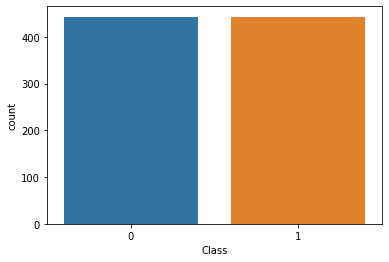

In [ ]:
# Class count
count_class_0, count_class_1 = train_df.Class.value_counts()

# Divide by class
train_df_0 = train_df[train_df['Class'] == 0]
train_df_1 = train_df[train_df['Class'] == 1]
#Random Under-sampling
train_df_0_under = train_df_0.sample(count_class_1)
train_df_under = pd.concat([train_df_0_under, train_df_1], axis=0)

print('Random under-sampling:')
print(train_df_under.Class.value_counts())

sns.countplot('Class', data=train_df_under)


Random over-sampling:
0    255884
1    255884
Name: Class, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


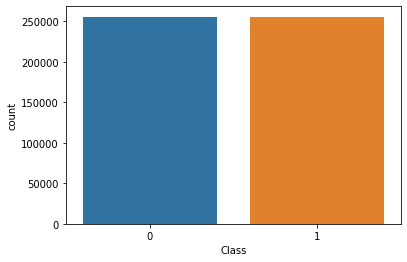

In [ ]:
#Random Over-sampling
train_df_1_over = train_df_1.sample(count_class_0, replace=True)
train_df_over = pd.concat([train_df_0, train_df_1_over], axis=0)

print('Random over-sampling:')
print(train_df_over.Class.value_counts())

sns.countplot('Class', data=train_df_over)

SMOTE over-sampling:
0    255884
1    255884
Name: Class, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


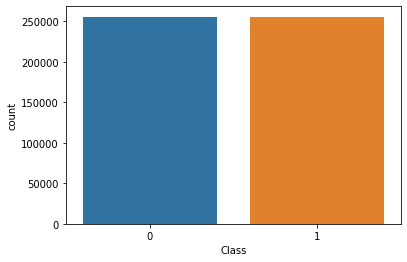

In [ ]:
#SMOTE
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
sm = SMOTE()
X_sm, y_sm = sm.fit_resample(X_train, y_train)

train_df_sm = X_sm
train_df_sm['Class'] = y_sm

print('SMOTE over-sampling:')
print(train_df_sm.Class.value_counts())
sns.countplot('Class', data=train_df_sm)

In [ ]:
train_df_sm.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Class'],
      dtype='object')

In [ ]:
X_train_under = train_df_under.drop(columns=['Class'])
y_train_under = train_df_under["Class"]

In [ ]:
X_train_smote = train_df_sm.drop(columns=['Class'])
y_train_smote = train_df_sm["Class"]

In [ ]:
X_train_over = train_df_over.drop(columns=['Class'])
y_train_over = train_df_over["Class"]

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


DT = DecisionTreeClassifier()
LR= LogisticRegression()
RF = RandomForestClassifier()


decision_OverSampling = DecisionTreeClassifier()
logistic_OverSampling = LogisticRegression()
RF_OverSampling = RandomForestClassifier()


decision_OverSampling.fit(X_train_over,y_train_over)
logistic_OverSampling.fit(X_train_over,y_train_over)
RF_OverSampling.fit(X_train_over,y_train_over)

DT.fit(X_train,y_train)
LR.fit(X_train,y_train)
RF.fit(X_train,y_train)


RandomForestClassifier()

In [ ]:
decision_UnderSampling = DecisionTreeClassifier()
logistic_UnderSampling = LogisticRegression()
RF_UnderSampling = RandomForestClassifier()

decision_smote = DecisionTreeClassifier()
logistic_smote = LogisticRegression()
RF_smote = RandomForestClassifier()


decision_UnderSampling.fit(X_train_under,y_train_under)
logistic_UnderSampling.fit(X_train_under,y_train_under)
RF_UnderSampling.fit(X_train_under,y_train_under)

decision_smote.fit(X_train_smote,y_train_smote)
logistic_smote.fit(X_train_smote,y_train_smote)
RF_smote.fit(X_train_smote,y_train_smote)


RandomForestClassifier()

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag=BaggingClassifier(
    base_estimator=DecisionTreeClassifier(),
    n_estimators= 10,
    max_samples=0.8,
    random_state=0
)

bag.fit(X_train, y_train)


BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=0.8,
                  random_state=0)

In [ ]:
bag_OverSampling=BaggingClassifier(
    base_estimator=DecisionTreeClassifier(),
    n_estimators= 10,
    max_samples=0.8,
    random_state=0)
bag_Undersampling=BaggingClassifier(
    base_estimator=DecisionTreeClassifier(),
    n_estimators= 10,
    max_samples=0.8,
    random_state=0)
bag_smote=BaggingClassifier(
    base_estimator=DecisionTreeClassifier(),
    n_estimators= 10,
    max_samples=0.8,
    random_state=0)


In [ ]:
bag_Undersampling.fit(X_train_under,y_train_under)
bag_OverSampling.fit(X_train_over,y_train_over)
bag_smote.fit(X_train_smote,y_train_smote)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=0.8,
                  random_state=0)

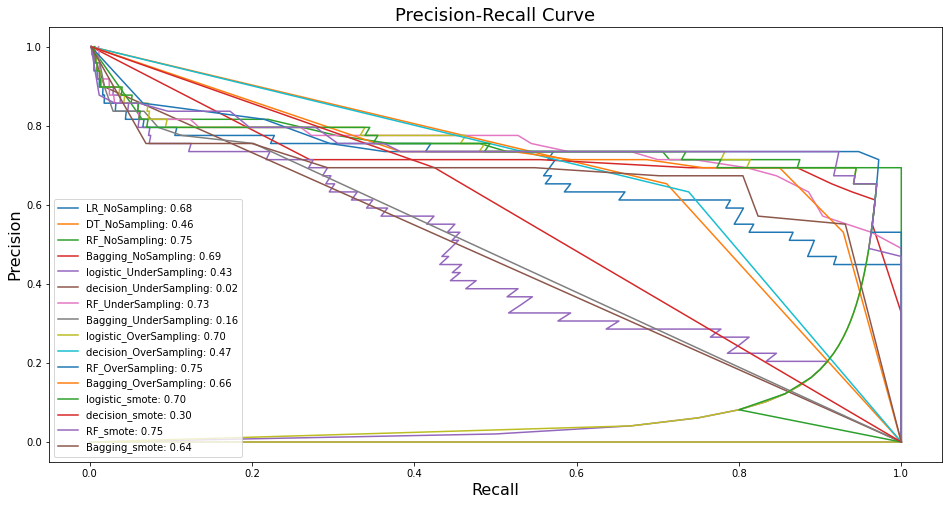

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score


log_fpr, log_tpr, log_thresold =precision_recall_curve(y_test, 
                                           LR.predict_proba(X_test)[:,1])
dt_fpr, dt_tpr, dt_thresold =precision_recall_curve(y_test, 
                                           DT.predict_proba(X_test)[:,1])
rf_fpr, rf_tpr, rf_threshold = precision_recall_curve(y_test, 
                                            RF.predict_proba(X_test)[:,1])
bag_fpr, bag_tpr, bag_threshold = precision_recall_curve(y_test, 
                                            bag.predict_proba(X_test)[:,1])



lru_fpr, lru_tpr, lru_thresold = precision_recall_curve(y_test, 
                                           logistic_UnderSampling.predict_proba(X_test)[:,1])
dtu_fpr, dtu_tpr, dtu_thresold = precision_recall_curve(y_test, 
                                           decision_UnderSampling.predict_proba(X_test)[:,1])
rfu_fpr, rfu_tpr, rfu_threshold = precision_recall_curve(y_test, 
                                            RF_UnderSampling.predict_proba(X_test)[:,1])
bagu_fpr, bagu_tpr, bagu_threshold = precision_recall_curve(y_test, 
                                            bag_Undersampling.predict_proba(X_test)[:,1])


lro_fpr, lro_tpr, lro_threshold =precision_recall_curve(y_test, 
                                               logistic_OverSampling.predict_proba(X_test)[:,1])
dto_fpr, dto_tpr, dto_thresold = precision_recall_curve(y_test, 
                                           decision_OverSampling.predict_proba(X_test)[:,1])
rfo_fpr, rfo_tpr, rfo_threshold = precision_recall_curve(y_test, 
                                            RF_OverSampling.predict_proba(X_test)[:,1])
bago_fpr, bago_tpr, bago_threshold = precision_recall_curve(y_test, 
                                            bag_OverSampling.predict_proba(X_test)[:,1])


lrsm_fpr, lrsm_tpr, lrsm_threshold = precision_recall_curve(y_test, 
                                               logistic_smote.predict_proba(X_test)[:,1])
dtsm_fpr, dtsm_tpr, dtsm_threshold = precision_recall_curve(y_test, 
                                               decision_smote.predict_proba(X_test)[:,1])
rfsm_fpr, rfsm_tpr, rfsm_threshold = precision_recall_curve(y_test, 
                                               RF_smote.predict_proba(X_test)[:,1])
bagsm_fpr, bagsm_tpr, bagsm_threshold = precision_recall_curve(y_test, 
                                               bag_smote.predict_proba(X_test)[:,1])



plt.figure(figsize=(16,8))
plt.title('Precision-Recall Curve', fontsize=18)
plt.plot(log_fpr, log_tpr, 
         label='LR_NoSampling: {0:0.2f}'.format( \
             average_precision_score(y_test, LR.predict_proba(X_test)[:,1])))
plt.plot(dt_fpr, dt_tpr, 
         label='DT_NoSampling: {0:0.2f}'.format( \
             average_precision_score(y_test, DT.predict_proba(X_test)[:,1])))
plt.plot(rf_fpr, rf_tpr, 
         label='RF_NoSampling: {0:0.2f}'.format( \
                                      average_precision_score(y_test, RF.predict_proba(X_test)[:,1])))
plt.plot(bag_fpr, bag_tpr, 
         label='Bagging_NoSampling: {0:0.2f}'.format( \
             average_precision_score(y_test, bag.predict_proba(X_test)[:,1])))

plt.plot(lru_fpr, lru_tpr, 
         label='logistic_UnderSampling: {0:0.2f}'.format( \
             average_precision_score(y_test, logistic_UnderSampling.predict_proba(X_test)[:,1])))
plt.plot(dtu_fpr, dtu_tpr, 
         label='decision_UnderSampling: {0:0.2f}'.format( \
             average_precision_score(y_test, decision_UnderSampling.predict_proba(X_test)[:,1])))
plt.plot(rfu_fpr, rfu_tpr, 
         label='RF_UnderSampling: {0:0.2f}'.format( \
             average_precision_score(y_test, RF_UnderSampling.predict_proba(X_test)[:,1])))
plt.plot(bagu_fpr, bagu_tpr, 
         label='Bagging_UnderSampling: {0:0.2f}'.format( \
             average_precision_score(y_test, bag_Undersampling.predict_proba(X_test)[:,1])))

plt.plot(lro_fpr, lro_tpr, 
         label='logistic_OverSampling: {0:0.2f}'.format( \
             average_precision_score(y_test, logistic_OverSampling.predict_proba(X_test)[:,1])))
plt.plot(dto_fpr, dto_tpr, 
         label='decision_OverSampling: {0:0.2f}'.format( \
             average_precision_score(y_test,decision_OverSampling.predict_proba(X_test)[:,1])))
plt.plot(rfo_fpr, rfo_tpr, 
         label='RF_OverSampling: {0:0.2f}'.format( \
             average_precision_score(y_test, RF_OverSampling.predict_proba(X_test)[:,1])))
plt.plot(bago_fpr, bago_tpr, 
         label='Bagging_OverSampling: {0:0.2f}'.format( \
             average_precision_score(y_test, bag_OverSampling.predict_proba(X_test)[:,1])))

plt.plot(lrsm_fpr, lrsm_tpr, 
         label='logistic_smote: {0:0.2f}'.format( \
             average_precision_score(y_test, logistic_smote.predict_proba(X_test)[:,1])))
plt.plot(dtsm_fpr, dtsm_tpr, 
         label='decision_smote: {0:0.2f}'.format( \
             average_precision_score(y_test, decision_smote.predict_proba(X_test)[:,1])))
plt.plot(rfsm_fpr, rfsm_tpr, 
         label='RF_smote: {0:0.2f}'.format( \
             average_precision_score(y_test, RF_smote.predict_proba(X_test)[:,1])))

plt.plot(bagsm_fpr, bagsm_tpr, 
         label='Bagging_smote: {0:0.2f}'.format( \
             average_precision_score(y_test, bag_smote.predict_proba(X_test)[:,1])))


plt.xlabel('Recall', fontsize=16)
plt.ylabel('Precision', fontsize=16)
plt.legend()
plt.show()

After applying stratified K-fold cross validation all the average precision scores are decreased

From there we can say that the model without applying cross validation are over fitted.

## The top four classifiers are Random Forest without sampling and with each sampling techniques

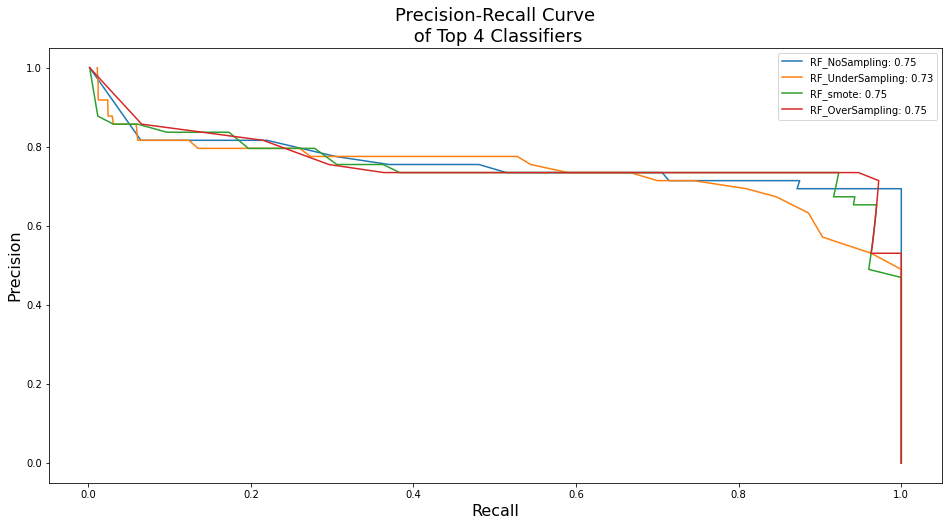

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
rf_fpr, rf_tpr, rf_threshold = precision_recall_curve(y_test, 
                                            RF.predict_proba(X_test)[:,1])
rfu_fpr, rfu_tpr, rfu_threshold = precision_recall_curve(y_test, 
                                            RF_UnderSampling.predict_proba(X_test)[:,1])
rfo_fpr, rfo_tpr, rfo_threshold = precision_recall_curve(y_test, 
                                            RF_OverSampling.predict_proba(X_test)[:,1])
rfsm_fpr, rfsm_tpr, rfsm_threshold = precision_recall_curve(y_test, 
                                               RF_smote.predict_proba(X_test)[:,1])

plt.figure(figsize=(16,8))
plt.title('Precision-Recall Curve\n of Top 4 Classifiers', fontsize=18)
plt.plot(rf_fpr, rf_tpr, 
         label='RF_NoSampling: {0:0.2f}'.format( \
             average_precision_score(y_test, RF.predict_proba(X_test)[:,1])))
plt.plot(rfu_fpr, rfu_tpr, 
         label='RF_UnderSampling: {0:0.2f}'.format( \
             average_precision_score(y_test, RF_UnderSampling.predict_proba(X_test)[:,1])))
plt.plot(rfsm_fpr, rfsm_tpr, 
         label='RF_smote: {0:0.2f}'.format( \
             average_precision_score(y_test, RF_smote.predict_proba(X_test)[:,1])))
plt.plot(rfo_fpr, rfo_tpr, 
         label='RF_OverSampling: {0:0.2f}'.format( \
             average_precision_score(y_test, RF_OverSampling.predict_proba(X_test)[:,1])))


plt.xlabel('Recall', fontsize=16)
plt.ylabel('Precision', fontsize=16)
plt.legend()
plt.show()  

## Confusion Matrices of Top four classifiers

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


RF with Under Sampling <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x7f021c56db10>


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


RF with Over Sampling <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x7f021c6bcb50>


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


RF with SMOTE <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x7f021c4b6b50>


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


RF  <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x7f021c81da10>


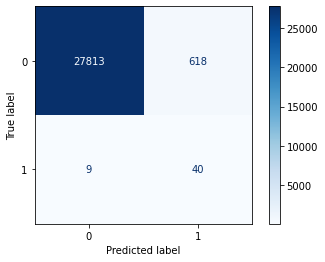

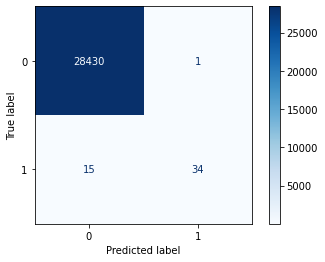

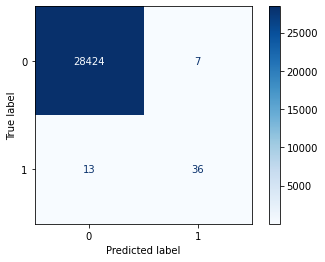

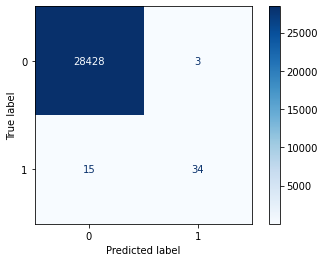

In [ ]:
from sklearn.metrics import plot_confusion_matrix

print("RF with Under Sampling",plot_confusion_matrix(RF_UnderSampling, X_test, y_test,cmap=plt.cm.Blues))
print("RF with Over Sampling",plot_confusion_matrix(RF_OverSampling, X_test, y_test,cmap=plt.cm.Blues))
print("RF with SMOTE",plot_confusion_matrix(RF_smote, X_test, y_test,cmap=plt.cm.Blues))
print("RF ",plot_confusion_matrix(RF, X_test, y_test,cmap=plt.cm.Blues))

## Classification Reports

In [ ]:
from sklearn.metrics import classification_report

print('Logistic Regression without Sampling:')
print(classification_report(y_test, LR.predict(X_test)))

print('Decision Tree without Sampling:')
print(classification_report(y_test, DT.predict(X_test)))

print('Random Forest without Sampling:')
print(classification_report(y_test, RF.predict(X_test)))



print('Logistic Regression with Under Sampling:')
print(classification_report(y_test, logistic_UnderSampling.predict(X_test)))

print('Decision Tree with Under Sampling:')
print(classification_report(y_test, decision_UnderSampling.predict(X_test)))

print('Random Forest with Under Sampling:')
print(classification_report(y_test, RF_UnderSampling.predict(X_test)))



Logistic Regression without Sampling:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28431
           1       0.87      0.53      0.66        49

    accuracy                           1.00     28480
   macro avg       0.93      0.77      0.83     28480
weighted avg       1.00      1.00      1.00     28480

Decision Tree without Sampling:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28431
           1       0.80      0.67      0.73        49

    accuracy                           1.00     28480
   macro avg       0.90      0.84      0.87     28480
weighted avg       1.00      1.00      1.00     28480

Random Forest without Sampling:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28431
           1       0.97      0.69      0.81        49

    accuracy                           1.00     28480
   macro avg       0.99   

In [ ]:
print('Logistic Regression with Over Sampling:')
print(classification_report(y_test, logistic_OverSampling.predict(X_test)))
print('Decision with Over Sampling:')
print(classification_report(y_test, decision_OverSampling.predict(X_test)))
print('Random Forest with Over Sampling:')
print(classification_report(y_test, RF_OverSampling.predict(X_test)))

print('Logistic Regression with SMOTE:')
print(classification_report(y_test, logistic_smote.predict(X_test)))
print('Decision Tree with SMOTE:')
print(classification_report(y_test, decision_smote.predict(X_test)))
print('Random Forest with SMOTE:')
print(classification_report(y_test, RF_smote.predict(X_test)))

print('Bagging')
print(classification_report(y_test, bag.predict(X_test)))

Logistic Regression with Over Sampling:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     28431
           1       0.06      0.86      0.12        49

    accuracy                           0.98     28480
   macro avg       0.53      0.92      0.55     28480
weighted avg       1.00      0.98      0.99     28480

Decision with Over Sampling:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28431
           1       0.72      0.67      0.69        49

    accuracy                           1.00     28480
   macro avg       0.86      0.84      0.85     28480
weighted avg       1.00      1.00      1.00     28480

Random Forest with Over Sampling:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28431
           1       0.97      0.69      0.81        49

    accuracy                           1.00     28480
   macro avg       0.99  

By comparing all the methods, we found that random forest classifier 
without applying any sample technique scored better that the others. Also the 
othersampling techniques- over sampling, SMOTE, under sampling with random 
forest scored better than the other models.